<a href="https://colab.research.google.com/github/DrSnek/Doctor/blob/main/Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Processing:

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [142]:
df = pd.read_csv("kidney_disease.csv")

In [143]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


## Functions:

In [160]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

In [161]:
def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  # plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  # plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')


## Data Cleaning:

In [144]:
data =  df
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [145]:
data = data.drop(['id'], axis = 1)
df2 = data.drop(['sg'], axis = 1)
df3 = df2.drop(['al'], axis = 1)
df4 = df3.drop(['pc'], axis = 1)
df5 = df4.drop(['pcc'], axis = 1)
df6 = df5.drop(['sod'], axis = 1)
df7 = df6.drop(['pot'], axis = 1)
df8 = df7.drop(['rbc'], axis = 1)
df9 = df8.drop(['ba'], axis = 1)
df10 = df9.drop(['bgr'], axis = 1)
df11 = df10.drop(['sc'], axis = 1)
df12 = df11.drop(['pcv'], axis = 1)
df13 = df12.drop(['htn'], axis = 1)
df14 = df13.drop(['dm'], axis = 1)
data = df14.drop(['pe'], axis = 1)

In [146]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Nominal Sugar','Blood Urea (mgs/dL)','Haemoglobin (gms)',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)',
               'Coronary Artery Disease','Appetite','Anaemia','Chronic Kidney Disease']
data.columns=feature_names
data.head()

,Age (yrs),Blood Pressure (mm/Hg),Nominal Sugar,Blood Urea (mgs/dL),Haemoglobin (gms),White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Coronary Artery Disease,Appetite,Anaemia,Chronic Kidney Disease
0,48,80.0,0.0,36.0,15.4,7800,5.2,no,good,no,yes
1,7,50.0,0.0,18.0,11.3,6000,NaN,no,good,no,yes
2,62,80.0,3.0,53.0,9.6,7500,NaN,no,poor,yes,yes
3,48,70.0,0.0,56.0,11.2,6700,3.9,no,poor,yes,yes
4,51,80.0,0.0,26.0,11.6,7300,4.6,no,good,no,yes


In [147]:
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8400' '10300' '9800'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '8300' '14600' '7100' '11800' '9400' '5500' '5800' '12500' '5600'
 '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600' '10200'
 '9000' '14900' '8200' '15200' '5000' '16300' '12400' '13200' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '6300' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
['5.2' nan '3.9' '4.6' '4.4' '5' '4' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6' '2.1'
 '5.6' '2.3' '2.9' '2.7' '8' '3.3' '3' '2.4' '5.4' '4.8' '6.1' '6.2' '6.3'
 '5.1' '5.8' '5.5' '5.3' '6.4' '5.9' '5.7' '6.5']


## Data Analysis:

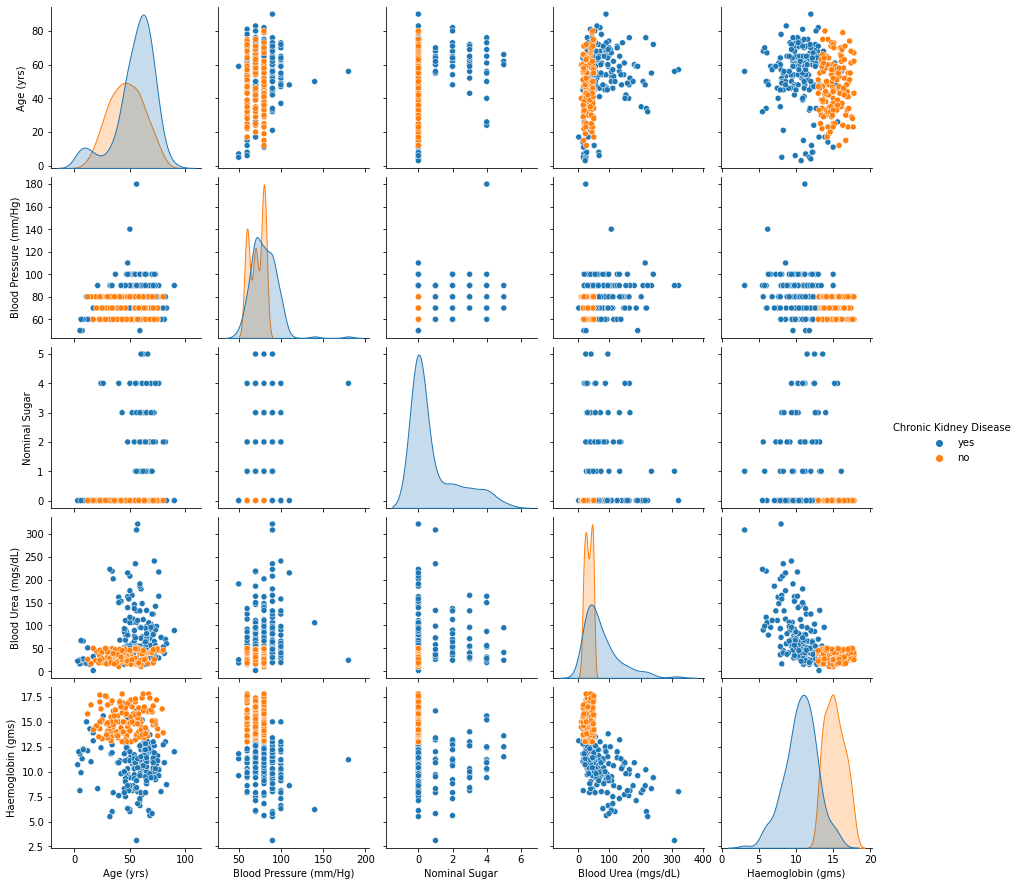

In [148]:
sns.pairplot(data = data, hue = 'Chronic Kidney Disease')

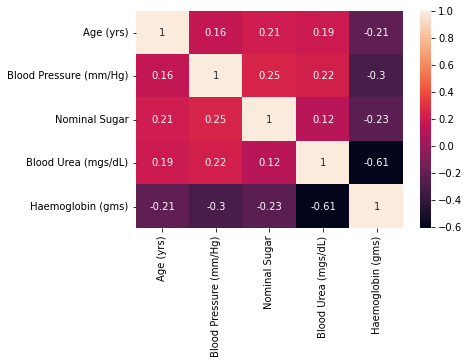

In [149]:
sns.heatmap(data.corr(), annot = True)

In [150]:
clusters = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(data[['Blood Urea (mgs/dL)','Haemoglobin (gms)']])
  clusters.append(km.inertia_)
  print(km.inertia_)

773283.1837920493
236748.59101503747
117589.48660609854
76049.24511803131
46587.44684516259
30569.86638354497
22223.60759991106
17372.904836211383
13182.199140246144


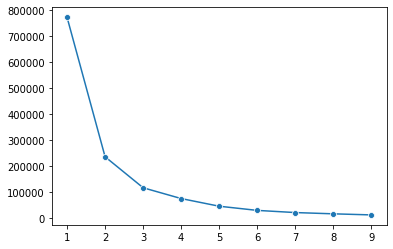

In [151]:
sns.lineplot(x=k_range, y = clusters, marker = 'o')

K = 2

In [152]:
print(data.isnull().sum())
data = data.drop(['Red Blood Cells (millions/cmm)'], axis = 1)
data = data.drop(['White Blood Cells (cells/cmm)'], axis = 1)

Age (yrs)                          0
Blood Pressure (mm/Hg)             9
Nominal Sugar                     34
Blood Urea (mgs/dL)                0
Haemoglobin (gms)                  0
White Blood Cells (cells/cmm)     55
Red Blood Cells (millions/cmm)    75
Coronary Artery Disease            2
Appetite                           1
Anaemia                            1
Chronic Kidney Disease             0
dtype: int64


## Model:

In [156]:
df1 = data
features = df1
features = features.drop(['Chronic Kidney Disease'], axis = 1)
labels = df1['Chronic Kidney Disease']

In [159]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [164]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_score = knn.predict_proba(x_test)[:, 1]

print_accuracy(y_test, knn_y_pred)
draw_confusion_matrix(y_test, knn_y_pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, knn_y_score, title = "AUC for KNN with k of 3")

ValueError: ignored

In [167]:
features

,Age (yrs),Blood Pressure (mm/Hg),Nominal Sugar,Blood Urea (mgs/dL),Haemoglobin (gms),Coronary Artery Disease,Appetite,Anaemia
0,48,80.0,0.0,36.0,15.4,no,good,no
1,7,50.0,0.0,18.0,11.3,no,good,no
2,62,80.0,3.0,53.0,9.6,no,poor,yes
3,48,70.0,0.0,56.0,11.2,no,poor,yes
4,51,80.0,0.0,26.0,11.6,no,good,no
...,...,...,...,...,...,...,...,...
322,55,80.0,0.0,49.0,15.7,no,good,no
323,42,70.0,0.0,31.0,16.5,no,good,no
324,12,80.0,0.0,26.0,15.8,no,good,no
325,17,60.0,0.0,50.0,14.2,no,good,no
